## Lab 7 Write-up -- Aureliano Liu

#### Settups :

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats,signal
from scipy.optimize import curve_fit
from scipy.special import factorial
from sklearn import preprocessing

# Preparing Higgs Data
higg = open ("higgs_100000_pt_1000_1200.pkl",'rb')
higgD = pickle.load(higg)

# Preparing QCD Data
qcd = open ("qcd_100000_pt_1000_1200.pkl",'rb')
qcdD = pickle.load(qcd)

#### Problem 1

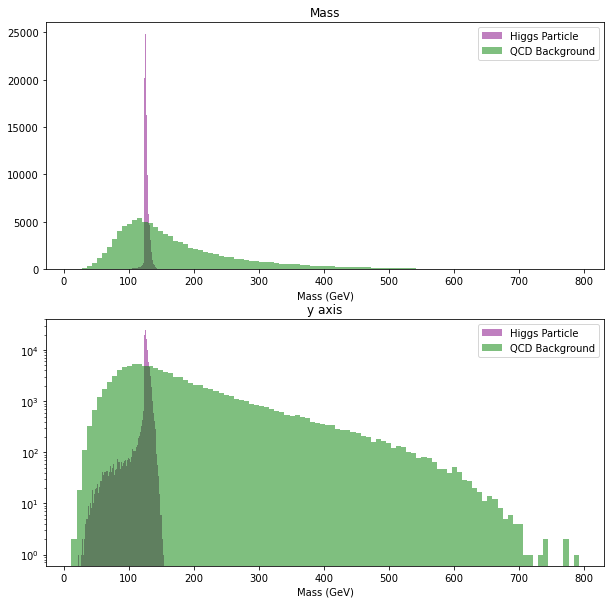

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

for i in range(0,2):
    ax[i].hist(higgD['mass'],bins=100,color='purple',alpha=0.5,label='Higgs Particle')
    ax[i].hist(qcdD['mass'],bins=100,color='green',alpha=0.5,label='QCD Background')
    ax[i].legend(loc='upper right')
    ax[i].set_xlabel("Mass (GeV)")

ax[0].set_title("Mass")
ax[1].set_title("y axis")
ax[1].set_yscale('log')

plt.show()

In [3]:
qcdMu = np.mean(qcdD['mass'])
higgsMu = np.mean(higgD['mass'])
mu = ((qcdMu+higgsMu)/2)
x = np.arange(stats.poisson.ppf(0.01, mu=mu),stats.poisson.ppf(0.99, mu=mu))
mu

151.9684818301115

In [4]:
cdf = stats.poisson.cdf(151.96,mu=125)
sig = stats.norm.ppf(cdf)
signif = 50/np.sqrt(2000)
print(f"Best-Fit Significance: {sig}")
print(f"Actual Significance: {signif}")

Best-Fit Significance: 2.3075513973236887
Actual Significance: 1.118033988749895


These 2 values are not equal, thus we need to optimize them in the following lab problems

#### Problem 2

In [5]:
def helper1(low_lim, high_lim, feature):
    
    higgs_count=1
    qcd_count = 1
    for hval,qval in zip(higgD[feature],qcdD[feature]):
        if low_lim <= hval <= high_lim:
            higgs_count+=1
        if low_lim <= qval <= high_lim:
            qcd_count+=1
            
    n = 50*(higgs_count/100000)
    d = np.sqrt(2000*(qcd_count/100000))
    significance = n/d
         
    print(f"The significance if you use a threshold from {low_lim} to {high_lim} is: {significance}")
        
        
xlow = [min(round(higgD['mass'])),100,124]
xhigh = [max(round(higgD['mass'])),150,128]
    
for i in range(0,len(xlow)):
    helper1(xlow[i], xhigh[i],'mass')

The significance if you use a threshold from 23.0 to 155.0 is: 1.5300467864859666
The significance if you use a threshold from 100 to 150 is: 1.95911751841519
The significance if you use a threshold from 124 to 128 is: 4.164727780077581


Thus, from the above statistics, we can see that the best-optimized significance is around 4.165 which is in the range of 124 to 128

#### Problem 3

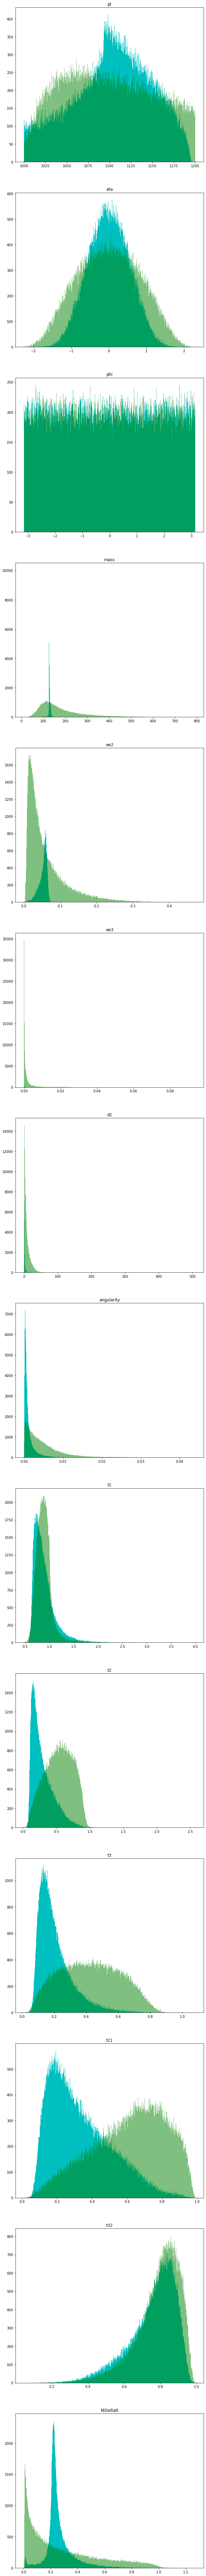

In [12]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))
features_list = ['pt','eta','phi','mass','ee2','ee3','d2','angularity','t1','t2','t3','t21','t32','KtDeltaR']
for i in range(len(features_list)):
    
    ax[i].hist(higgD[features_list[i]],500,color = 'c')

    ax[i].hist(qcdD[features_list[i]],500,alpha=.5,color = 'g')
    ax[i].set_title(features_list[i])
    
plt.show() 

In [7]:
def helper2(low_lim,high_lim,feature):
    indexes = []
    feature_list = list(feature)
    for qval in feature_list:
        if low_lim <= qval <= high_lim:
            indexes.append(feature_list.index(qval))
            
    return indexes

In [8]:
qcd_feature = qcdD['mass']
qcd_mass_indexes = helper2(124,126,qcd_feature)

h_feature = higgD['mass']
h_mass_indexes = helper2(124,126,h_feature)

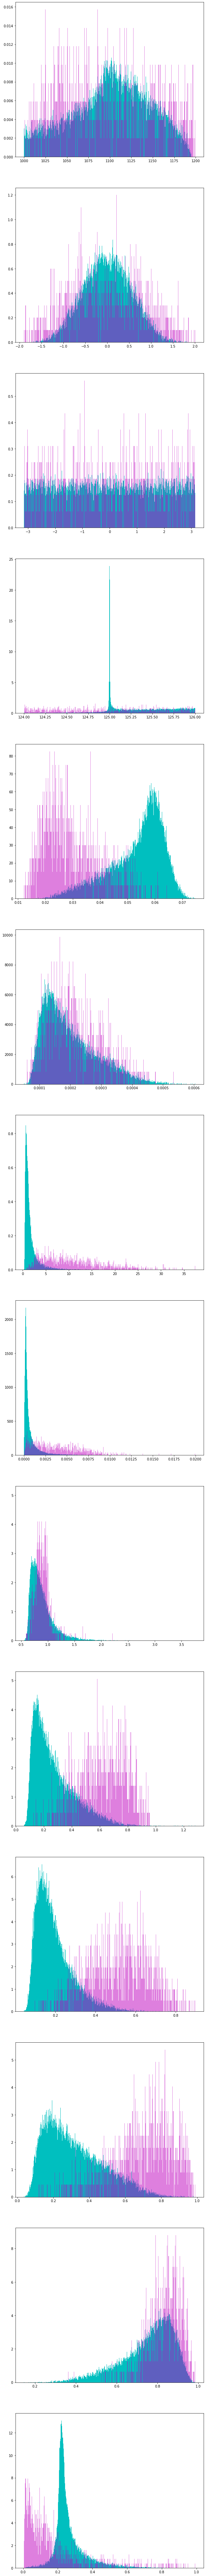

In [9]:
fig,ax=plt.subplots(14, 1, figsize=(10,140))

for i in range(len(features_list)):
    qcd_optimized_mass = []
    for index in qcd_mass_indexes:
        qcd_optimized_mass.append((qcdD[features_list[i]])[index])
        
    higgs_optimized_mass = []
    for index in h_mass_indexes:
        higgs_optimized_mass.append((higgD[features_list[i]])[index])

    ax[i].hist(higgs_optimized_mass,500,density=True,color = "c") 
    ax[i].hist(qcd_optimized_mass,500,density=True,alpha=.5,color = "m") 
    
plt.show() 

In [17]:
numerator = 50*(len(h_mass_indexes)/100000)
denominator = np.sqrt(2000*(len(qcd_mass_indexes)/100000))
significance = numerator/denominator
print(significance)

2.7842866586013777


Since the significance is still lower than 5 sigma threshold, we did not identify an ideal feature

#### Problem 4

In [10]:
qcd_angularity_feature = []
for index in qcd_mass_indexes:
    qcd_angularity_feature.append((qcdD['angularity'])[index])
        
qcd_t1_feature = []
for index in qcd_mass_indexes:
    qcd_t1_feature.append((qcdD['t21'])[index])

higgs_angularity_feature = []
for ind in h_mass_indexes:
    higgs_angularity_feature.append((higgD['angularity'])[index])
        
higgs_t1_feature = []
for index in h_mass_indexes:
    higgs_t1_feature.append((higgD['t21'])[index])

qcd_angularity_indexes = helper2(0,.003,qcd_angularity_feature)
qcd_tau_indexes = helper2(0,.7,qcd_t1_feature)
h_angularity_indexes = helper2(0,.003,higgs_angularity_feature)
h_tau_indexes = helper2(0,.7,higgs_t1_feature)

In [14]:
qcd_master_list = []
higgs_master_list = []
qcd_master_list.extend(qcd_mass_indexes)
qcd_master_list.extend(qcd_angularity_indexes)
qcd_master_list.extend(qcd_tau_indexes)
higgs_master_list.extend(h_mass_indexes)
higgs_master_list.extend(h_angularity_indexes)
higgs_master_list.extend(h_tau_indexes)
qcd_unique_indexes = list(set(qcd_master_list))
higgs_unique_indexes = list(set(higgs_master_list))

# Find significance
numerator = 50*(len(higgs_unique_indexes)/100000)
denominator = np.sqrt(2000*(len(qcd_unique_indexes)/100000))
significance = numerator/denominator
         
print(f"The significance after applying is: {significance}")

The significance after applying is: 3.6857203666647926


## END OF LAB 7